# Classifying Images of Clothing Using TensorFlow

*How to train a Deep Learning model to classify images of clothing using Convolutional Neural Networks in TensorFlow.*

Deep Learning is a subfield of machine learning that uses multi-layered neural networks to extracts patterns from data. My objective within this project is to present how to apply Deep Learning concepts to an image classification problem. For this, we are going to train a Convolutional Neural Network (CNN) to classify a dataset of clothing using the TensorFlow library in Python.

In the last few years, Convolutional Neural Networks has been achieving superhuman performance on some complex visual tasks. They power image search services, self-driving cars, automatic video classification systems, and more<sup>1</sup>.

## Understanding and Importing the Dataset

We are going to use the Fashion MNIST dataset, which contains 70,000 greyscale images of clothing in 10 categories, like shirts, dresses, and sandals. The images represent individual clothing with 28 x 28 pixels of resolution. You can see some examples of them in the picture below.

<table>
  <tr><td>
    <img src="https://raw.githubusercontent.com/hugoplm/computer-vision/main/img/Fashion_MNIST_Samples_by%20Zalando.png" height="600">
  </td></tr>
  <tr><td align="center">
    <a href="https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png">Fashion-MNIST Samples</a> by Zalando.<br/>&nbsp;
  </td></tr>
</table>


Each image has a single class in the range [0, 9]. We can see in the table below the classes in the dataset.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>



In [1]:
# importing the libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

The dataset can be loaded directly from Keras, using the Datasets API. It is split in train (60,000 samples) and test (10,000 samples).

In [2]:
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = keras.datasets.fashion_mnist.load_data()

We can check the shape of the datasets. As expected, we have 60,000 samples in the training dataset and 10,000 in the test dataset, each of them with 28 x 28 pixels (X_train) and 1 class (y_train).

In [3]:
print("X_train: ", X_train_raw.shape)
print("y_train: ", y_train_raw.shape)
print("X_test:  ", X_test_raw.shape)
print("y_test:  ", y_test_raw.shape)

X_train:  (60000, 28, 28)
y_train:  (60000,)
X_test:   (10000, 28, 28)
y_test:   (10000,)


In the class datasets, we have only the label for each class. We can define a new variable with the names for each label, as presented in the table above. This will be used when plotting some images with the corresponding class.

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploring the Dataset

An image is just a matrix of numbers, in our problem a 28 x 28 matrix. Each value is in the range [0, 255], which defines the color and intensity of each pixel.

Here we can see the first 5 rows from the first sample of our training dataset.

In [5]:
X_train_raw[0][:5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3]], dtype=uint8)

Now, let's plot this image using the matplotlib library. Since our image is in greyscale, we can pass a binary argument for the color map.

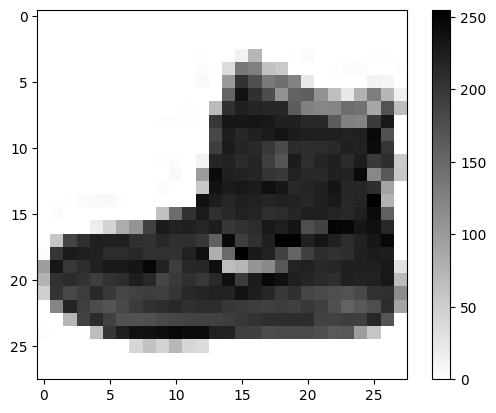

In [6]:
plt.imshow(X_train_raw[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

Then, we can confirm which class our image represents.

In [7]:
print("Class label: ", y_train_raw[0])
print("Class name:  ", class_names[y_train_raw[0]])

Class label:  9
Class name:   Ankle boot


We can display a few examples from our train dataset with the respective class. Plotting the first 24 samples, it is possible to see at least one example of each class.

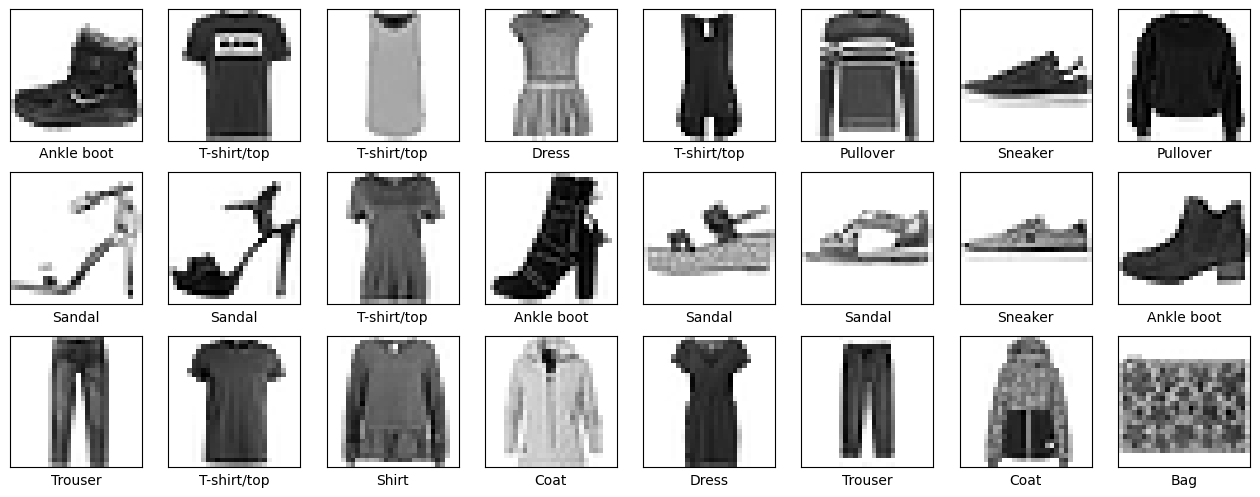

In [8]:
plt.figure(figsize=(16,6))
for i in range(24):
    plt.subplot(3,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_raw[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_raw[i]])
plt.show()

## Preprocessing the Data

**Normalizing**

The value of each pixel in the image, an integer in the range [0, 255], needs to be normalized for the model to work properly. We can create a function that divides each value by 255.0. When applying this function to our dataset, we will get normalized values in the range [0,1]. Furthermore, we can transform it to 'float32' to reduce memory usage.

In [9]:
def normalize(X):
  X = (X / 255.0).astype('float32')
  return X

In [10]:
X_train = normalize(X_train_raw)
X_test = normalize(X_test_raw)

**Reshaping the Image**

The Convolutional Neural Network expects 4 dimensions as input: number of samples (60,000), pixels (28 x 28), and color channel. Since we are working with greyscale images there is only a single channel. However, as we have seen before, the shape of our X_train dataset is (6000, 28, 28) and we need (6000, 28, 28, 1) as input. Thus, we need to reshape our datasets.

In [11]:
# redimensionar as imagens
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)

X_train:  (60000, 28, 28, 1)
X_test:   (10000, 28, 28, 1)


**One-Hot Encoding**

Our class data has labels in the range [0, 9], which is called *Integer Encoding*.


In [12]:
np.unique(y_train_raw)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

However, there is no ordinal relationship between the labels and the corresponding class. 

In this case, using the integer encoding allows the model to assume a natural ordering between categories, which may result in poor performance or unexpected results from the Deep Learning model. To solve this problem, we can use a one-hot encode, which creates a new binary variable for each unique integer value<sup>2</sup>.

In [13]:
y_train = keras.utils.to_categorical(y_train_raw,10)
y_test = keras.utils.to_categorical(y_test_raw,10)

Now, let's check how are our label data. Each label changed from a single value to a vector with value "1" in the respective position.

In [14]:
print("First Label Before One-Hot Encoding: ", y_train_raw[0])
print("First Label After One-Hot Encoding:  ", y_train[0])

First Label Before One-Hot Encoding:  9
First Label After One-Hot Encoding:   [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Creating the Model

**Building the Layers**

The first step in the model creation is to define the layers of our network. The CNN has at least one convolutional layer and also includes other types of layers, such as pooling layers and fully connected layers (dense).  For this project, we are going to use a typical CNN architecture represented in the image below.

<table>
  <tr><td>
    <img src="https://raw.githubusercontent.com/hugoplm/computer-vision/main/img/Typical_CNN%20Architecture_by%20Géron_Aurélien(2019).png" height="150">
  </td></tr>
  <tr><td align="center">
   <br>Typical CNN Architecture by Géron, Aurélien (2019).<br/>
  </td></tr>
</table>

As we have in the image, we will include a convolutional and a pooling layers, then another convolutional and pooling layers. Then, we are going to add a flatten layer to transform our 2d-array image in a 1d-array and add some dense layers. We can add some dropout layers to reduce overfitting. For the last layer, we add a dense layer with the number of classes from our problem (10) and a softmax activation, which creates the probability distribution for each class.



In [15]:
model = keras.models.Sequential([
  keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', 
                      padding='same', input_shape=[28, 28, 1]),
  keras.layers.MaxPool2D(pool_size=2),
  keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', 
                      padding='same'),
  keras.layers.MaxPool2D(pool_size=2),
  keras.layers.Flatten(),
  keras.layers.Dense(units=128, activation='relu'),
  keras.layers.Dropout(0.25),
  keras.layers.Dense(units=64, activation='relu'),
  keras.layers.Dropout(0.25),
  keras.layers.Dense(units=10, activation='softmax'),
])

**Compiling the Model**

The next step is to compile the model. Here we pass the optimizer, which adjusts the weights to minimize the loss, the loss function, which measures the disparity between the true and predicted values, and the metrics, a function used to measure the performance of the model.

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Training the Model**

The last step is to train our model. Here we need to pass the input data, the target data and the number of epochs, which defines the number of full iterations of the training dataset. We will also pass a parameter to split our data in training (70%) and validation (30%) and a parameter to define the batch_size, which is the number of training examples in each pass.

We will save the results of our training in the variable *model_history*.

*Obs.: if you are running this notebook, I recommend you change the runtime type to GPU. It will train the model really faster than using the CPU (No hardware accelerator).*

In [17]:
model_history = model.fit(X_train, y_train, batch_size=50, epochs=10, validation_split=0.3)

Epoch 1/10
840/840 [==============================] - 57s 66ms/step - loss: 0.5708 - accuracy: 0.7957 - val_loss: 0.3409 - val_accuracy: 0.8731
Epoch 2/10
840/840 [==============================] - 55s 66ms/step - loss: 0.3420 - accuracy: 0.8807 - val_loss: 0.2863 - val_accuracy: 0.8925
Epoch 3/10
840/840 [==============================] - 55s 65ms/step - loss: 0.2843 - accuracy: 0.8992 - val_loss: 0.2517 - val_accuracy: 0.9081
Epoch 4/10
840/840 [==============================] - 62s 74ms/step - loss: 0.2461 - accuracy: 0.9109 - val_loss: 0.2400 - val_accuracy: 0.9114
Epoch 5/10
840/840 [==============================] - 59s 71ms/step - loss: 0.2236 - accuracy: 0.9193 - val_loss: 0.2309 - val_accuracy: 0.9173
Epoch 6/10
840/840 [==============================] - 56s 67ms/step - loss: 0.1968 - accuracy: 0.9283 - val_loss: 0.2239 - val_accuracy: 0.9205
Epoch 7/10
840/840 [==============================] - 55s 66ms/step - loss: 0.1809 - accuracy: 0.9350 - val_loss: 0.2302 - val_accuracy:

**Evaluating the Loss**

The fit method returns a history object with the results for each epoch. We can plot a chart with the loss and accuracy for the training and validation datasets. From this chart, it is possible to see how the loss goes down and the accuracy goes up over the epochs. This chart is also used to identify evidence of overfitting and underfitting. For our model, it doesn't seem we have strong evidence of these problems. Thus, let's move on and make some predictions with our test dataset.

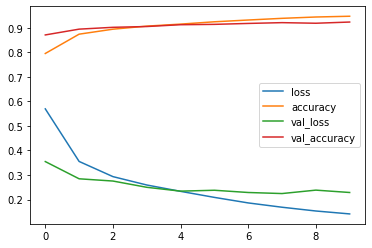

In [44]:
pd.DataFrame(model_history.history).plot()
plt.show()

## Making Predictions and Evaluating the Results

**Evaluating the Accuracy in the Test Dataset**

Now, let's see how the model performs with our test dataset.

In [19]:
model.evaluate(X_test, y_test);


313/313 [==============================] - 1s 3ms/step - loss: 0.2715 - accuracy: 0.9155


The accuracy on the training dataset is smaller than the accuracy on the test and validation datasets. However, this is still a good result with 91,55% of accuracy.

**Making Predictions**

We can use our model to predict a class for each example in our test database and store the results in the variable predictions.

In [20]:
predictions = model.predict(X_test)

Now, let's plot a few images from our test dataset with the true and the predicted labels. When the model predicts right, the text will be displayed in blue, if the prediction is wrong, it will be displayed in red. Also, it will be displayed the calculated probability for the predicted class.

In [21]:
def plot_img_label(img, pred_class, pred_percentage, true_class):

  plt.imshow(img,cmap=plt.cm.binary)

  if pred_class == true_class:
    color = 'blue'
  else:
    color = 'red'

  plt.title(label= f"Predicted: {pred_class} - {pred_percentage:2.1f}%\nActual: {true_class}", 
            fontdict={'color': color})

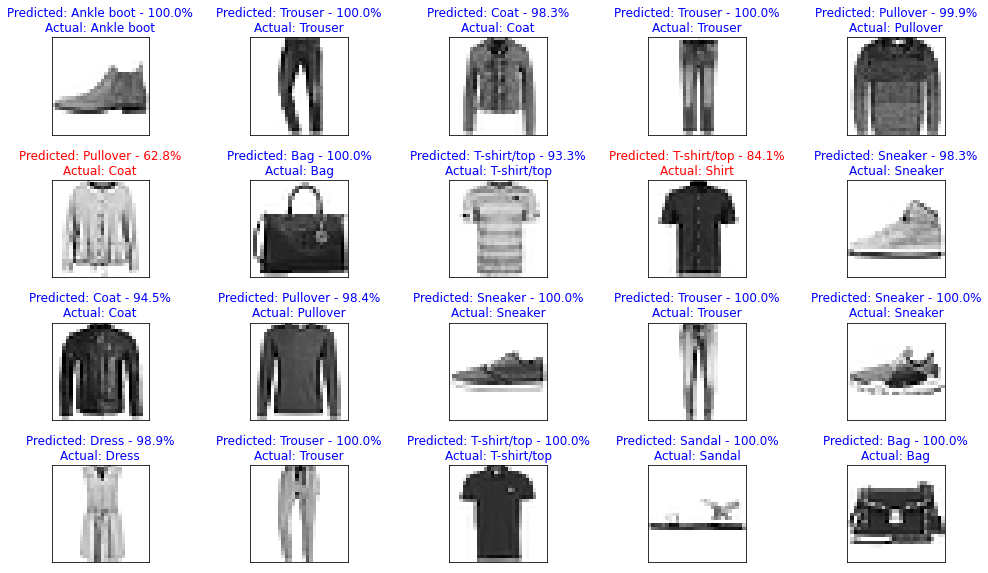

In [22]:
plt.figure(figsize=(14,10))
for i in range(20):
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    i = i * 5

    img = X_test[i].reshape(28,28)
    pred_class = class_names[np.argmax(predictions[i])]
    pred_percentage = np.max(predictions[i])*100
    true_class = class_names[np.argmax(y_test[i])]
    
    plot_img_label(img, pred_class, pred_percentage, true_class)

plt.tight_layout()
plt.show()

From these 20 examples, we can see that our model made wrong predictions for one coat and one shirt. However, it is not feasible to analyze the predictions for 10,000 examples using this plot. Thus, let's plot a crosstab to analyze what our model predicted right and wrong for each class.

**Crosstab**

First, let's create our crosstab. Here we will have the columns and index with our labels [0 - 9]. After creating it, we can rename the columns and indexes to display the name of the classes instead of the labels.

In [23]:
predicted_label = np.argmax(predictions,axis = 1)
true_label = np.argmax(y_test, axis = 1)

In [24]:
crosstab = pd.crosstab(true_label, predicted_label, rownames=["True"], colnames=["Predicted"], margins=True)

In [25]:
classes = {}
for item in zip(range(10), class_names):
  classes[item[0]] = item[1]

In [26]:
crosstab.rename(columns=classes, index=classes, inplace=True)
crosstab

Predicted,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot,All
True,,,,,,,,,,,
T-shirt/top,840,1,15,11,3,2,124,0,4,0,1000
Trouser,1,985,0,9,2,0,2,0,1,0,1000
Pullover,17,1,892,3,44,0,42,0,1,0,1000
Dress,18,10,12,897,23,0,40,0,0,0,1000
Coat,1,1,73,20,866,0,38,0,1,0,1000
Sandal,0,0,0,0,0,991,0,8,0,1,1000
Shirt,74,2,73,19,58,0,769,0,5,0,1000
Sneaker,0,0,0,0,0,8,0,962,0,30,1000
Bag,2,0,0,4,3,2,4,4,981,0,1000


Analyzing our crosstab, we can notice that our best accuracy was achieved for the Sandals classification (99,1%), while our lowest accuracy was for the Shirts (76,9%). The crosstab provides a great way to visualize the quantities predicted by our model for each class. We can easily see, for example, that it predicted Shirt as T-shirt/Top for 74 examples or that it didn't predict any Bag as Ankle boot.

**Classification Report**

Now, let's plot a summary with the precision, recall and, f1-score for each class using the classification report from the scikit-learn library. Here it is possible to see that we didn't have a considerate disparity between precision and recall for any classes. As we noticed in the crosstab, our worst result is for the Shirt class.

In [27]:
print(classification_report(true_label, predicted_label, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.84      0.86      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.84      0.89      0.86      1000
       Dress       0.93      0.90      0.91      1000
        Coat       0.87      0.87      0.87      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.75      0.77      0.76      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



##Conclusion

In this project, it was presented how to train a Convolutional Neural Network to classify images of clothing from the Fashion MNIST dataset using TensorFlow and Keras. Using this model, we got an overall accuracy of 91,55% in our test dataset, which is a good result. However, specifically for our *Shirt* class we got an accuracy of only 76,90%. We could try to improve the accuracy of this class using some data augmentation techniques. Furthermore, in case you want to get a model with higher accuracy, you could try changing some hyperparameters or using different network architectures.